In [51]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# Any results you write to the current directory are saved as output.

#Importing all the needed libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#Importing the Training & Test sets
train=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

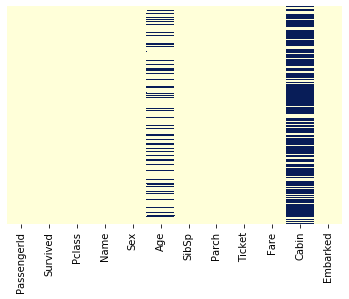

In [53]:
#Visualizing the null values using HeatMaps
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='YlGnBu')

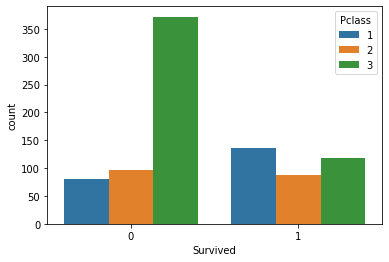

In [54]:
#Visualizing Survivors based on their Passenger Classes
sns.countplot(x='Survived',hue='Pclass',data=train)

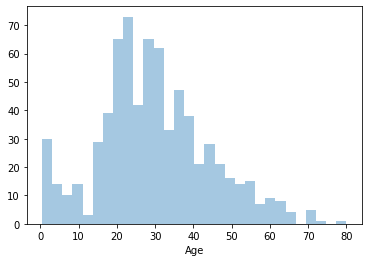

In [55]:
#Plotting on the basis of the Age of the Passengers
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

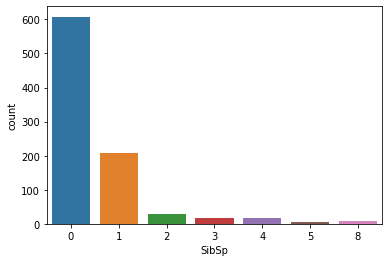

In [56]:
#Counting the number of Passengers who had boarded with their siblings and/or their spouses
sns.countplot(x='SibSp', data=train)

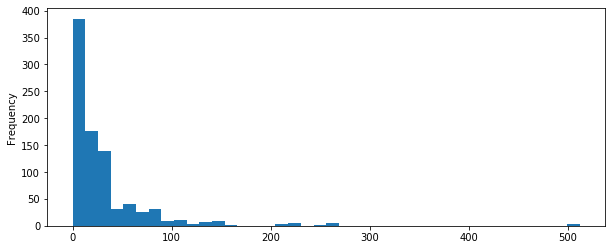

In [57]:
#Plotting Fare against the number of Passengers
train['Fare'].plot.hist(bins=40, figsize=(10,4))

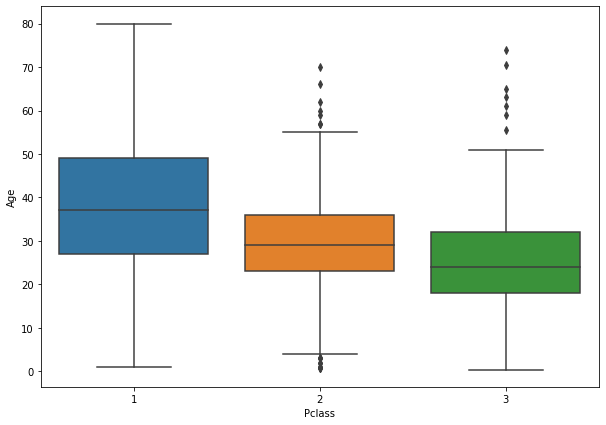

In [58]:
#Getting the Age of the Passengers on the basis of their Class, also the average Age per class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [59]:
#Defing a  function that will impute the Age columns on the basis of the Pclass
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [60]:
#Calling the above defined function to impute the Age column
train['Age']=train[['Age', 'Pclass']].apply(impute_age, axis=1)

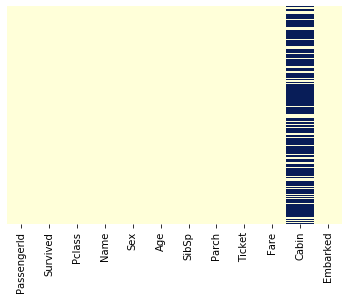

In [61]:
#Visualizing after the Imputation of the Age column
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [62]:
#Dropping the Cabin column since it doesn't have any direct effect on the prediction
train.drop('Cabin', axis=1, inplace=True)

In [63]:
#Checking the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


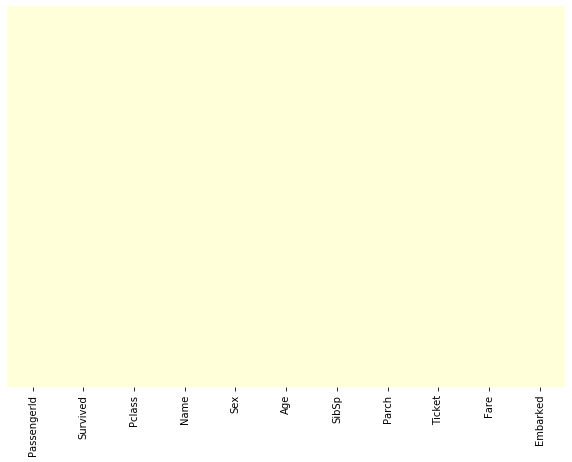

In [64]:
#Using HeatMap again to visualize the resultant set
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [65]:
#Dropping the remaining rows with null values in them
train.dropna(inplace=True)

In [66]:
#Dealing with categorical column Sex, Embarked, making dummmies
sex=pd.get_dummies(train['Sex'], drop_first=True)
embark=pd.get_dummies(train['Embarked'], drop_first=True)
classes=pd.get_dummies(train['Pclass'])

In [67]:
#Concatinating the newly created dummy columns with the existing dataframe
train=pd.concat([train,sex,embark], axis=1)
train=pd.concat([train,classes], axis=1)

In [68]:
#Dropping columns which will not be used during training
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
train.drop('PassengerId', axis=1, inplace=True)
train.drop('Pclass', axis=1, inplace=True)

In [69]:
# We are done with cleaning of the training set. We now need to do the same to the Test set

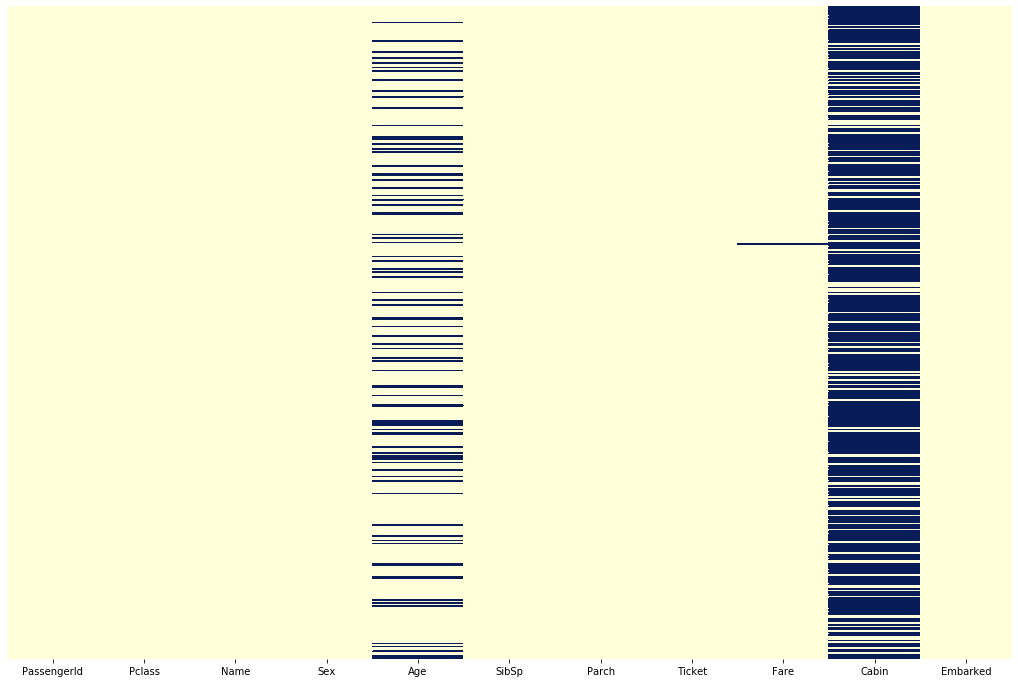

In [70]:
#Visulazing missing values using HeatMap
plt.figure(figsize=(18,12))
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap='YlGnBu')

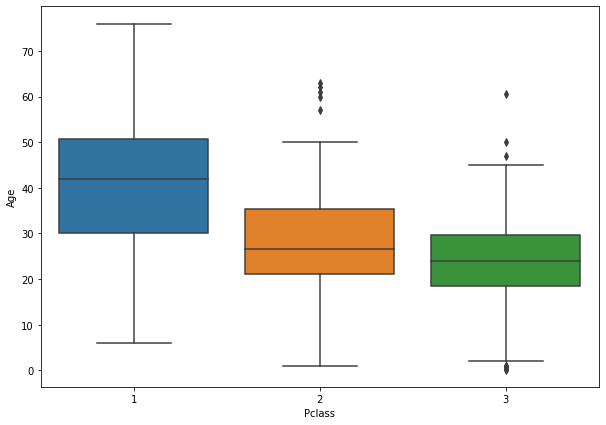

In [71]:
#Using BoxPlot to see which age group belongs to which Pclass
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=test)

In [72]:
#Defining a function which will be used to impute Age columns of the Test set
def impute_age2(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 24
    else:
        return Age

In [73]:
#Imputing the Age column by calling the above function        
test['Age']=test[['Age', 'Pclass']].apply(impute_age2, axis=1)

In [74]:
# As we saw in the heatmap that some of the values of 'Fare' column are missing
#Imputing Fare column for missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(test.iloc[:, 8:9])
test.iloc[:, 8:9] = imputer.transform(test.iloc[:, 8:9])

/Users/nicholasbergeland/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


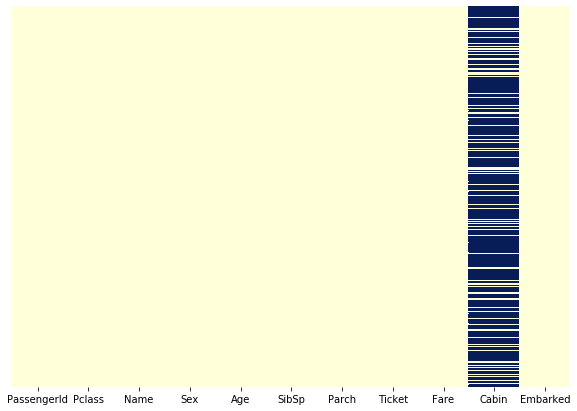

In [75]:
#Using HeatMap again to visualize the remaining missing values from the set
plt.figure(figsize=(10,7))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [76]:
# The 'Cabin' column has too many values missing, so cannot perform imputation here.
#Dropping the Cabin column as done in the Training set
test.drop('Cabin', axis=1, inplace=True)

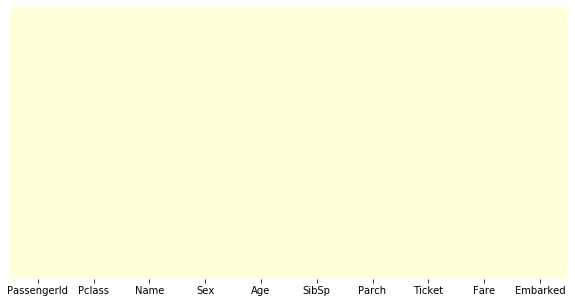

In [77]:
#Visualizing again to see the effect after Imputation
plt.figure(figsize=(10,5))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [78]:
#Creating Dummy variables for categorical feaatures of the set and concatinating them to the Test set
sex2=pd.get_dummies(test['Sex'], drop_first=True)
embark2=pd.get_dummies(test['Embarked'], drop_first=True)
test=pd.concat([test,sex2,embark2], axis=1)
pclasses=pd.get_dummies(test['Pclass'])
test=pd.concat([test,pclasses], axis=1)

In [79]:
#Saving PassengerId before dropping it so that we can add it to the resultant csv file later
result=test.iloc[:,0]

In [80]:
#Dropping the redundant features which were converted to dummies earlier
test.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)
test.drop('Pclass', axis=1, inplace=True)

In [81]:
#Building a logistic regression model
#Train Test Split
x_train=train.iloc[:,1:]
y_train=train.iloc[:,0:1]
x_test=test.iloc[:,:]

In [82]:
#Training and predicting
from sklearn.linear_model import LogisticRegression
logisticReg=LogisticRegression()
logisticReg.fit(x_train,y_train)

y_pred= logisticReg.predict(x_test)

/Users/nicholasbergeland/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nicholasbergeland/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
#calculating our models accuracy
accuracy = round(logisticReg.score(x_train, y_train) * 100, 2)

In [84]:
#Check accuracy
print(accuracy)

81.21


In [85]:
#predictions to csv
df=pd.DataFrame(dict(PassengerId = result, Survived = y_pred)).reset_index()
df.drop('index', axis=1, inplace=True)

df.to_csv('logresult.csv', index=False)

In [86]:
#using random forest classifier
from sklearn.ensemble import RandomForestClassifier
ranFor = RandomForestClassifier(n_estimators = 70)

In [87]:
#training and predicting
ranFor.fit(x_train,y_train)
y_pred2= ranFor.predict(x_test)

/Users/nicholasbergeland/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [88]:
#calculate accuracy of model 2
accuracy2 =round(ranFor.score(x_train, y_train)*100,2)

In [89]:
print(accuracy2)

98.2


In [90]:
#write these results to CSV
df=pd.DataFrame(dict(PassengerId = result, Survived = y_pred2)).reset_index()
df.drop('index', axis=1, inplace=True)

df.to_csv('rfcresult.csv', index=False)

In [91]:
#using support vector machine
from sklearn.svm import SVC
svc=SVC()

In [92]:
#training and predicting
svc.fit(x_train, y_train)

y_pred3=svc.predict(x_test)

/Users/nicholasbergeland/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicholasbergeland/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [93]:
#calculating model accuracy
accuracy3=round(svc.score(x_train, y_train)*100,2)

In [94]:
print(accuracy3)

87.74


In [95]:
#Writing the predictions to a csv file
df=pd.DataFrame(dict(PassengerId = result, Survived = y_pred2)).reset_index()
df.drop('index', axis=1, inplace=True)

df.to_csv('svcresult.csv', index=False)

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, StratifiedKFold
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(x, y) 

NameError: name 'x' is not defined

In [ ]:
#Boosted Tree

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [ ]:
# SGD
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)